# K-Means

In [1]:
"""
Veri Seti Oluşturma
  • Bu bölümde K-Ortalama kümeleme algoritmasını eğitebilmek için gerekli olan veriyi oluşturacağız
  • Veri içerisinde 3 ayrı küme bulunacak
"""  

'\nVeri Seti Oluşturma\n  • Bu bölümde K-Ortalama kümeleme algoritmasını eğitebilmek için gerekli olan veriyi oluşturacağız\n  • Veri içerisinde 3 ayrı küme bulunacak\n'

In [2]:
# Kütüphaneyi içe aktar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# veri seti oluştur

# küme 1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

# küme 2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# küme 3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3), axis=0)
y = np.concatenate((y1,y2,y3), axis=0)

dictionary = {"x":x, "y":y}
data = pd.DataFrame(dictionary)
data.head()

,x,y
0,23.469403,22.743774
1,26.957253,24.925358
2,29.064830,20.144800
3,26.736855,30.354556
4,34.560221,30.476434


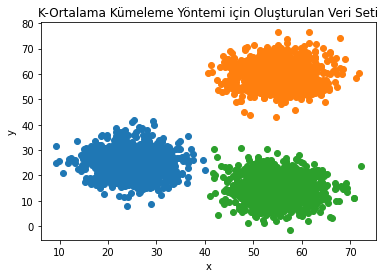

In [4]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortalama Kümeleme Yöntemi için Oluşturulan Veri Seti")
plt.show()

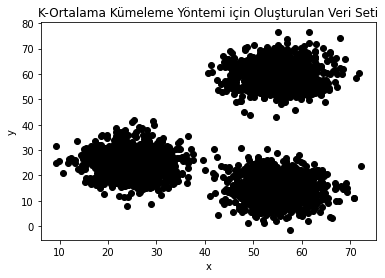

In [5]:
# k-means algoritması veriyi böyle görecek
plt.figure()
plt.scatter(x1,y1, color="black")
plt.scatter(x2,y2, color="black")
plt.scatter(x3,y3, color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortalama Kümeleme Yöntemi için Oluşturulan Veri Seti")
plt.show()

In [6]:
"""
K Değerinin Seçimi
  • K değerini seçmek için dirsek yöntemini kullanacağız
  • Bu yönteme göre en uygun K değeri dirsek görünümünün oluştuğu bölgedeki K değeridir
"""

'\nK Değerinin Seçimi\n  • K değerini seçmek için dirsek yöntemini kullanacağız\n  • Bu yönteme göre en uygun K değeri dirsek görünümünün oluştuğu bölgedeki K değeridir\n'

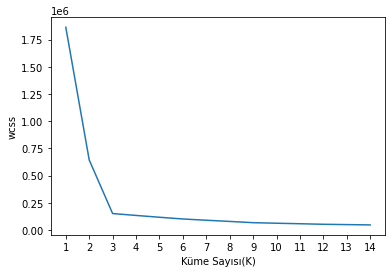

In [7]:
# k-means'ı içe aktar 
from sklearn.cluster import KMeans
wcss=[]

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.figure()
plt.plot(range(1,15), wcss)
plt.xticks(range(1,15))
plt.xlabel("Küme Sayısı(K)")
plt.ylabel("wcss")
plt.show()
# Şekilden de görüleceği üzere K değerini 3 seçmek en uygun seçenektir

No handles with labels found to put in legend.


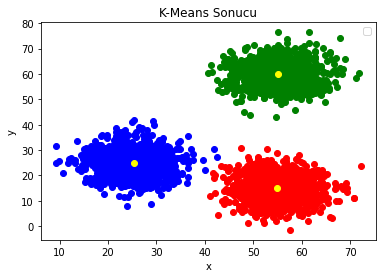

In [8]:
# K-Means Algoritması Eğitimi ve Testi
k_ortalama = KMeans(n_clusters=3)
kumeler = k_ortalama.fit_predict(data)
data["label"] = kumeler

plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0], color = "red")
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], color = "green")
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], color = "blue")
plt.scatter(k_ortalama.cluster_centers_[:,0], k_ortalama.cluster_centers_[:,1], color="yellow")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Means Sonucu")
plt.show()

# Hierarchical Clustering

In [9]:
"""
Veri Seti Oluşturma
  • Bu bölümde hiyerarşik kümeleme algoritmasını eğitebilmek için gerekli olan veriyi oluşturacağız
  • Veri içerisinde 3 ayrı küme bulunacak
  • K-Means'ta yaptığımıza benzer olacak
"""  

"\nVeri Seti Oluşturma\n  • Bu bölümde hiyerarşik kümeleme algoritmasını eğitebilmek için gerekli olan veriyi oluşturacağız\n  • Veri içerisinde 3 ayrı küme bulunacak\n  • K-Means'ta yaptığımıza benzer olacak\n"

In [10]:
# Kütüphaneyi içe aktar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# veri seti oluştur

# küme 1
x1 = np.random.normal(25,5,20)
y1 = np.random.normal(25,5,20)

# küme 2
x2 = np.random.normal(55,5,20)
y2 = np.random.normal(60,5,20)

# küme 3
x3 = np.random.normal(55,5,20)
y3 = np.random.normal(15,5,20)

x = np.concatenate((x1,x2,x3), axis=0)
y = np.concatenate((y1,y2,y3), axis=0)

dictionary = {"x":x, "y":y}
data = pd.DataFrame(dictionary)
data.head()

,x,y
0,25.764090,35.589392
1,29.812476,23.452877
2,22.572317,27.057604
3,26.313162,17.596647
4,24.324693,28.019330


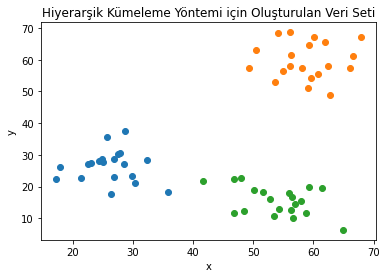

In [12]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Hiyerarşik Kümeleme Yöntemi için Oluşturulan Veri Seti")
plt.show()

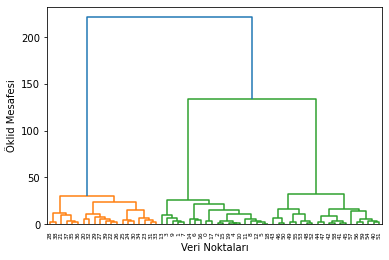

In [13]:
# Dendogram Gösterimi
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data, method="ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("Veri Noktaları")
plt.ylabel("Öklid Mesafesi")
plt.show()

In [14]:
 """
  • Yukarıdaki şekilden yola çıkarak, en uzun yapraklardan bir kesim yaparsak 3 adet 
  kümeye sahip olduğumuzu görebiliriz. Bu nedenle hiyerarşik kümeleme yöntemini eğitirken
  3 adet küme oluşturacağız
 """

'\n • Yukarıdaki şekilden yola çıkarak, en uzun yapraklardan bir kesim yaparsak 3 adet \n kümeye sahip olduğumuzu görebiliriz. Bu nedenle hiyerarşik kümeleme yöntemini eğitirken\n 3 adet küme oluşturacağız\n'

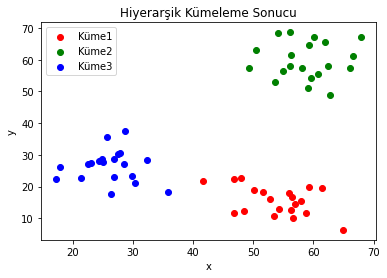

In [15]:
# Hiyerarşik Kümeleme Algoritması Eğitimi ve Testi
from sklearn.cluster import AgglomerativeClustering

hiyerarsi_kume = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
kume = hiyerarsi_kume.fit_predict(data)

data["label"] = kume

plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0], color = "red", label="Küme1")
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], color = "green", label="Küme2")
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], color = "blue", label="Küme3")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Hiyerarşik Kümeleme Sonucu")
plt.show()

# TEMEL BİLEŞEN ANALİZİ

In [ ]:
"""
Veri Seti Tanıma
  • Temel bileşen analizini yapmak için iris veri setini kullanacağız
  • Iris veri seti Sklearn kütüphanesinin içerisinde bulunmaktadır
  • Iris veri setinde 3 adet sınıf(Setosa, Versicolor and Virginica) ve bu sınıflara
  ait 4 adet özellik(sepal uzunluk(cm), sepal genişlik(cm), petal uzunluğu(cm) ve
  petal genişliği(cm)) bulunmaktadır
"""

In [16]:
# Kütüphaneyi içe aktar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn iris data set
from sklearn.datasets import load_iris

In [18]:
# veri yükle
iris = load_iris()

data = iris.data
feature_names = iris.feature_names
y = iris.target

df = pd.DataFrame(data, columns=feature_names)
df["sinif"] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
# Temel Bileşen Analizi Uygulaması

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True) # whiten = normalize n_components = bileşen sayısı
pca.fit(data)

x_pca = pca.transform(data)
print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ", sum(pca.explained_variance_ratio_))

variance ratio:  [0.92461872 0.05306648]
sum:  0.9776852063187951


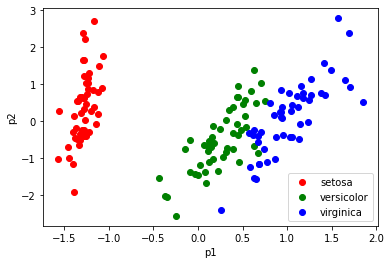

In [20]:
# temel bileşenleri görselleştirelim

df["p1"] = x_pca[:,0]
df["p2"] = x_pca[:,1]

color = ["red", "green", "blue"]

for each in range(3):
    plt.scatter(df.p1[df.sinif == each], df.p2[df.sinif == each], color = color[each], label = iris.target_names[each])

plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")

plt.show()

In [ ]:
 """
  • Temel bileşen analizi sonucunda setosa sınıfının diğer iki sınıftan tamamen
görebiliyoruz
  • Virginica ve Versicolor sınıfları ise neredeyse birbirlerinden ayrılmışlar,
aralarında ince bir sınır bulunmaktadır
"""

# PCA ve Kernel PCA Karşılaştırma

In [23]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

x, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=0)

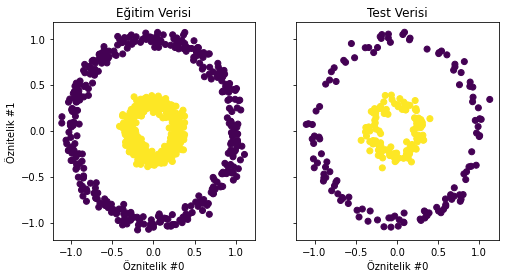

In [25]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8,4))

train_ax.scatter(x_train[:,0], x_train[:,1], c=y_train)
train_ax.set_ylabel("Öznitelik #1")
train_ax.set_xlabel("Öznitelik #0")
train_ax.set_title("Eğitim Verisi")

test_ax.scatter(x_test[:,0], x_test[:,1], c=y_test)
test_ax.set_xlabel("Öznitelik #0")
_ = test_ax.set_title("Test Verisi")

In [26]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

x_test_pca = pca.fit(x_train).transform(x_test)
x_test_kernel_pca = kernel_pca.fit(x_train).transform(x_test)

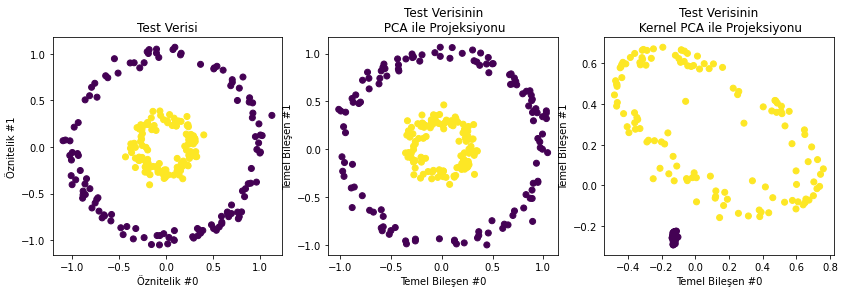

In [28]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(ncols=3, figsize=(14,4))

orig_data_ax.scatter(x_test[:,0], x_test[:,1], c=y_test)
orig_data_ax.set_ylabel("Öznitelik #1")
orig_data_ax.set_xlabel("Öznitelik #0")
orig_data_ax.set_title("Test Verisi")

pca_proj_ax.scatter(x_test_pca[:,0], x_test_pca[:,1], c=y_test)
pca_proj_ax.set_ylabel("Temel Bileşen #1")
pca_proj_ax.set_xlabel("Temel Bileşen #0")
pca_proj_ax.set_title("Test Verisinin\n PCA ile Projeksiyonu")

kernel_pca_proj_ax.scatter(x_test_kernel_pca[:,0], x_test_kernel_pca[:,1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Temel Bileşen #1")
kernel_pca_proj_ax.set_xlabel("Temel Bileşen #0")
_ = kernel_pca_proj_ax.set_title("Test Verisinin\n Kernel PCA ile Projeksiyonu")